# Used Cars Price Predictions by Prashant Pathak.

### Loding Important modules, libraries and Data:

In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [2]:
car=pd.read_csv("cars_df")

### Data Analysis:

In [3]:
car.head()

,Unnamed: 0.1,Unnamed: 0,Brand,Model with Variant,Manufacturing Year,Driven KM,Fuel Type,No. of Owner,Locetion,Price
0,0,0,Volkswagen,['Polo'],2013.0,"90,758",Patrol,First,Kemri,"3,30,000"
1,1,1,Honda,['WRV'],2020.0,"29,629",Patrol,First,Sector 18,"8,80,000"
2,2,2,Mercedes-Benz,['C-Class'],2022.0,"1,000",Patrol,First,Lucknow Cantonment,"59,90,000"
3,3,3,Maruti,"['Suzuki', 'Swift']",2019.0,"40,000",Patrol,First,Kotwali Ganj,"5,10,000"
4,4,4,Maruti,"['Suzuki', 'Wagon-R']",2016.0,"90,000",Patrol,First,Syana Garh,"2,80,000"


In [4]:
car.shape

(5333, 10)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        5333 non-null   int64  
 1   Unnamed: 0          5333 non-null   int64  
 2   Brand               5333 non-null   object 
 3   Model with Variant  5333 non-null   object 
 4   Manufacturing Year  5333 non-null   float64
 5   Driven KM           5333 non-null   object 
 6   Fuel Type           5333 non-null   object 
 7   No. of Owner        5333 non-null   object 
 8   Locetion            5333 non-null   object 
 9   Price               5333 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 416.8+ KB


In [6]:
car['Manufacturing Year'].unique()

array([2013., 2020., 2022., 2019., 2016., 2018., 2017., 2014., 2021.,
       2009., 2012., 2015., 2006., 2008., 2010., 2011., 2007., 2005.,
       1918., 2023., 2003., 2004., 1992., 2000., 2002., 1998., 1997.,
       1985., 2001., 1994., 1996., 1999., 1995., 1986., 1983., 1970.,
       1990., 1989.])

In [7]:
car['Driven KM'].unique()

array(['90,758', '29,629', '1,000', ..., "['42,775']", "['60,309']",
       "['12,058']"], dtype=object)

In [8]:
car["Price"].unique()

array(['3,30,000', '8,80,000', '59,90,000', '5,10,000', '2,80,000',
       '3,50,000', '6,70,000', '4,85,000', '4,95,000', '4,00,000',
       '3,25,000', '5,50,000', '6,20,000', '4,35,000', '3,55,000',
       '4,45,000', '17,90,000', '18,75,000', '25,50,000', '6,96,000',
       '1,65,000', '4,50,000', '7,50,000', '5,90,000', '7,90,000',
       '16,00,000', '5,99,000', '2,25,000', '3,65,000', '2,85,000',
       '6,00,000', '5,40,000', '5,00,000', '3,15,000', '79,000',
       '10,65,000', '4,90,000', '3,00,000', '19,50,000', '2,99,999',
       '1,90,000', '2,10,000', '1,10,000', '6,25,000', '10,00,000',
       '3,75,000', '5,25,000', '2,00,000', '13,00,000', '11,50,000',
       '1,80,000', '5,60,000', '2,95,000', '4,80,000', '2,35,000',
       '1,99,000', '36,000', '9,75,000', '4,75,000', '12,75,000',
       '2,55,000', '2,70,000', '3,35,000', '6,50,000', '4,60,000',
       '4,05,000', '40,000', '2,40,000', '23,000', '3,60,000', '2,50,000',
       '6,45,000', '2,45,000', '1,45,000', '11,

In [9]:
car["Fuel Type"].unique()

array(['Patrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [10]:
car["Brand"].unique()

array(['Volkswagen', 'Honda', 'Mercedes-Benz', 'Maruti', 'Hyundai',
       'Tata', 'MG', 'Toyota', 'Mahindra', 'Renault', 'Ford', 'Nissan',
       'mercedes-benz-1', 'Jaguar', 'Jeep', 'Kia', 'Bajaj', 'Chevrolet',
       'Datsun', 'Other', 'Skoda', 'Audi', 'Mini', 'Porsche', 'Fiat',
       'BMW', 'Bentley', 'Mitsubishi', 'Ambassador', 'Lexus', 'Land',
       'Mercedes', 'Maserati', 'Volvo', 'audi', 'Isuzu', 'Ashok', 'Aston',
       'Ssangyong', 'Mazda', 'ashok-leyland', 'bajaj1', 'Daewoo'],
      dtype=object)

In [11]:
car["Model with Variant"].unique()

array(["['Polo']", "['WRV']", "['C-Class']", "['Suzuki', 'Swift']",
       "['Suzuki', 'Wagon-R']", "['i10']", "['Grand', 'i10']",
       "['Tiago']", "['i20']", "['Suzuki', 'Baleno']", "['Santro']",
       "['Hector', 'Plus']", "['Innova', 'Crysta']",
       "['Suzuki', 'Ertiga']", "['Suzuki', 'Zen', 'Estilo']",
       "['Suzuki', 'S-Presso']", "['City']", "['Glanza']", "['Thar']",
       "['Amaze']", "['KWID']", "['Eon']", "['Suzuki', 'Alto', '800']",
       "['Suzuki', 'Wagon', 'R']", "['Suzuki', 'Alto-K10']",
       "['Suzuki', 'Wagon-R-1-0']", "['Suzuki', 'Alto-800']", "['Nano']",
       "['Venue']", "['Suzuki', 'Ritz']", "['Figo', 'Aspire']",
       "['Suzuki', 'Celerio']", "['Suzuki', 'Vitara-Brezza']",
       "['Creta']", "['Suzuki', 'XL6']", "['Suzuki', 'Sx4']",
       "['Suzuki', 'Alto']", "['Suzuki', 'Swift-Dzire']",
       "['Micra', 'Active']", "['Elite', 'i20']", "['i20', 'Active']",
       "['Suzuki', 'Ignis']", "['Brio']", "['Suzuki', 'Celerio-X']",
       "['Verna']", 

In [12]:
car['Locetion'].unique()

array(['Kemri', 'Sector 18', 'Lucknow Cantonment', ..., 'Chatradahalli',
       'Kashipur', 'Sainagar'], dtype=object)

In [40]:
car['No. of Owner'].unique()

array(['First', 'Second', 'Third', 'Sceond'], dtype=object)

### Result of Data Analysis:


### Data Cleaning on the basis of above results:

In [13]:
backup=car.copy()

In [14]:
# Remove Useless column from dataframe:
car=car.drop(["Unnamed: 0"],axis=1)

In [15]:
car=car.drop(["Unnamed: 0.1"],axis=1)

In [16]:
car=car.drop(["Locetion"],axis=1)

In [17]:
car

,Brand,Model with Variant,Manufacturing Year,Driven KM,Fuel Type,No. of Owner,Price
0,Volkswagen,['Polo'],2013.0,"90,758",Patrol,First,"3,30,000"
1,Honda,['WRV'],2020.0,"29,629",Patrol,First,"8,80,000"
2,Mercedes-Benz,['C-Class'],2022.0,"1,000",Patrol,First,"59,90,000"
3,Maruti,"['Suzuki', 'Swift']",2019.0,"40,000",Patrol,First,"5,10,000"
4,Maruti,"['Suzuki', 'Wagon-R']",2016.0,"90,000",Patrol,First,"2,80,000"
...,...,...,...,...,...,...,...
5328,Hyundai,['Santro'],2001.0,"['100,000']",CNG,Third,"70,000"
5329,Maruti,"['Suzuki', 'Swift']",2006.0,"['112,000']",CNG,Third,"1,20,000"
5330,Maruti,"['Suzuki', 'Zen-Estilo']",2007.0,"['72,000']",CNG,Third,"1,40,000"
5331,Hyundai,"['Santro', 'Xing']",2009.0,"['69,000']",CNG,Third,"1,85,000"


In [18]:
car['Manufacturing Year']=car['Manufacturing Year'].astype(int)

In [19]:
car = car.apply(lambda x: x.replace(',', ''))
car = car.apply(lambda x: x.replace('[', ''))
car = car.apply(lambda x: x.replace(']', ''))

In [20]:
car['Driven KM'] = car['Driven KM'].map(lambda x: ''.join([i for i in x if i.isdigit()]))

In [21]:
car=car[car['Driven KM'].str.isnumeric()]

In [22]:
car['Driven KM']=car['Driven KM'].astype(int)

In [23]:
car['Price'] = car['Price'].map(lambda x: ''.join([i for i in x if i.isdigit()]))

In [24]:
car["Price"]=car["Price"].astype(int)

In [25]:
car["Model with Variant"]=car["Model with Variant"].str.replace("'",'')

In [26]:
car["Model with Variant"]=car["Model with Variant"].str.replace("[",'')

In [27]:
car["Model with Variant"]=car["Model with Variant"].str.replace("]",'')

In [28]:
car["Model with Variant"]=car["Model with Variant"].str.replace(" ",'')

In [41]:
car['No. of Owner']= car["No. of Owner"].str.replace('Sceond','Fourth')

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5285 entries, 0 to 5332
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               5285 non-null   object
 1   Model with Variant  5285 non-null   object
 2   Manufacturing Year  5285 non-null   int32 
 3   Driven KM           5285 non-null   int32 
 4   Fuel Type           5285 non-null   object
 5   No. of Owner        5285 non-null   object
 6   Price               5285 non-null   int32 
dtypes: int32(3), object(4)
memory usage: 268.4+ KB


In [30]:
car.reset_index(drop=True)

,Brand,Model with Variant,Manufacturing Year,Driven KM,Fuel Type,No. of Owner,Price
0,Volkswagen,Polo,2013,90758,Patrol,First,330000
1,Honda,WRV,2020,29629,Patrol,First,880000
2,Mercedes-Benz,C-Class,2022,1000,Patrol,First,5990000
3,Maruti,"Suzuki,Swift",2019,40000,Patrol,First,510000
4,Maruti,"Suzuki,Wagon-R",2016,90000,Patrol,First,280000
...,...,...,...,...,...,...,...
5280,Hyundai,Santro,2001,100000,CNG,Third,70000
5281,Maruti,"Suzuki,Swift",2006,112000,CNG,Third,120000
5282,Maruti,"Suzuki,Zen-Estilo",2007,72000,CNG,Third,140000
5283,Hyundai,"Santro,Xing",2009,69000,CNG,Third,185000


The above car's data is clean and it is ready to use in my opinion.

In [31]:
# Saving clean data into a csv file.
car.to_csv("cars_data_after_cleaning")

### Statiscis Analysis:

In [32]:
car.describe()

,Manufacturing Year,Driven KM,Price
count,5285.000000,5.285000e+03,5.285000e+03
mean,2012.575024,2.562246e+05,4.940251e+05
std,5.049293,4.021121e+05,7.544678e+05
min,1918.000000,0.000000e+00,1.500000e+04
25%,2009.000000,6.200000e+04,1.700000e+05
50%,2013.000000,9.000000e+04,2.900000e+05
75%,2016.000000,3.160000e+05,5.000000e+05
max,2023.000000,9.000000e+06,1.200000e+07


In [33]:
car.corr()

,Manufacturing Year,Driven KM,Price
Manufacturing Year,1.000000,-0.028727,0.351821
Driven KM,-0.028727,1.000000,0.041836
Price,0.351821,0.041836,1.000000


<AxesSubplot:>

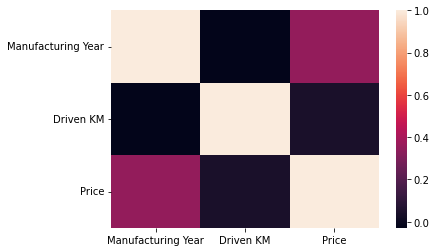

In [34]:
sns.heatmap(car.corr())

[Text(0.5, 1.0, 'Outliers')]

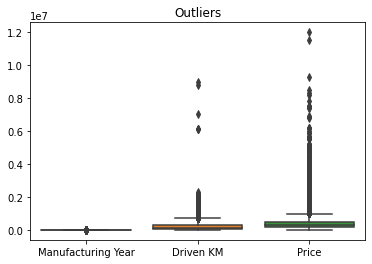

In [35]:
sns.boxplot(data=car).set(title="Outliers")

We have outliers in Driven Km and Price column beacuse some brands are costly so i think no need to drop it.

### Graphical Analysis:

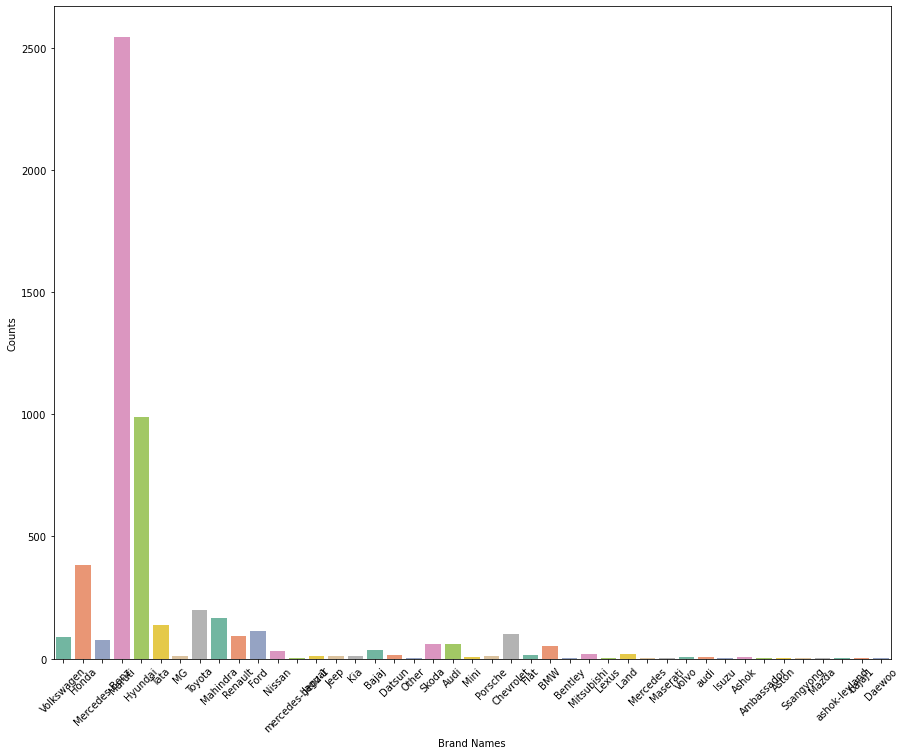

Maruti             2542
Hyundai             989
Honda               383
Toyota              197
Mahindra            168
Tata                137
Ford                111
Chevrolet           101
Renault              93
Volkswagen           88
Mercedes-Benz        77
Audi                 61
Skoda                58
BMW                  53
Bajaj                35
Nissan               30
Mitsubishi           18
Land                 17
Fiat                 16
Datsun               15
Jeep                 12
Kia                  12
MG                   10
Porsche               9
Jaguar                9
Volvo                 8
Mini                  6
audi                  5
Ashok                 5
Ambassador            4
mercedes-benz-1       2
Isuzu                 2
Aston                 2
Bentley               1
Lexus                 1
Other                 1
Mercedes              1
Maserati              1
Ssangyong             1
Mazda                 1
ashok-leyland         1
bajaj1          

In [36]:
plt.figure(figsize=(15,12))
sns.countplot(x='Brand',data=car,palette='Set2')
plt.xlabel("Brand Names")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()
print(car['Brand'].value_counts())

Maruti is best selling car in the market.

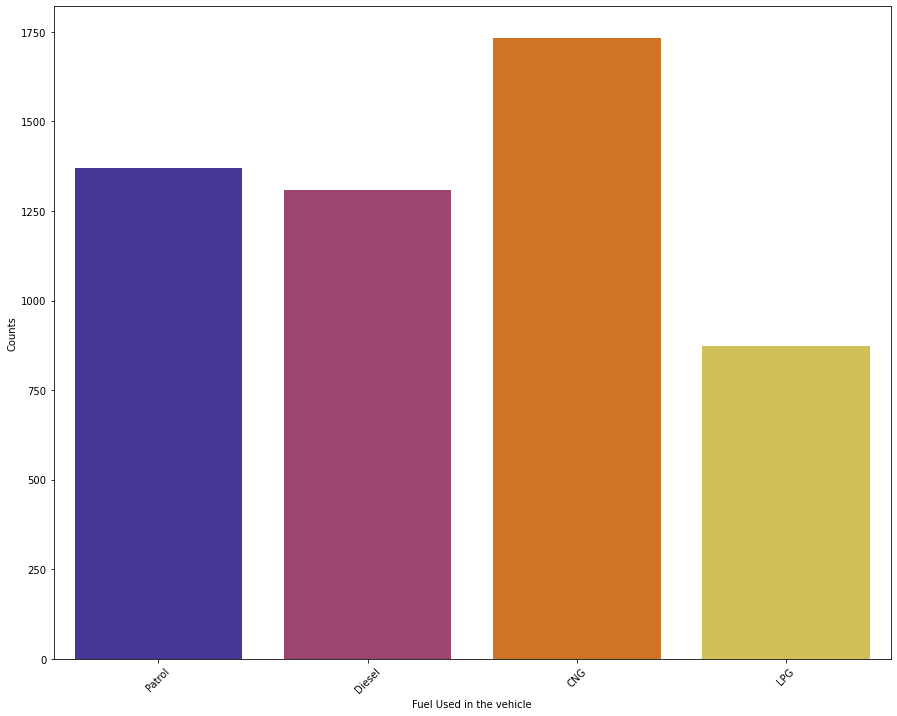

CNG       1734
Patrol    1370
Diesel    1309
LPG        872
Name: Fuel Type, dtype: int64


In [37]:

plt.figure(figsize=(15,12))
sns.countplot(x='Fuel Type',data=car,palette='CMRmap')
plt.xlabel("Fuel Used in the vehicle")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(car['Fuel Type'].value_counts())

The relevance of CNG cars is highest in the market.

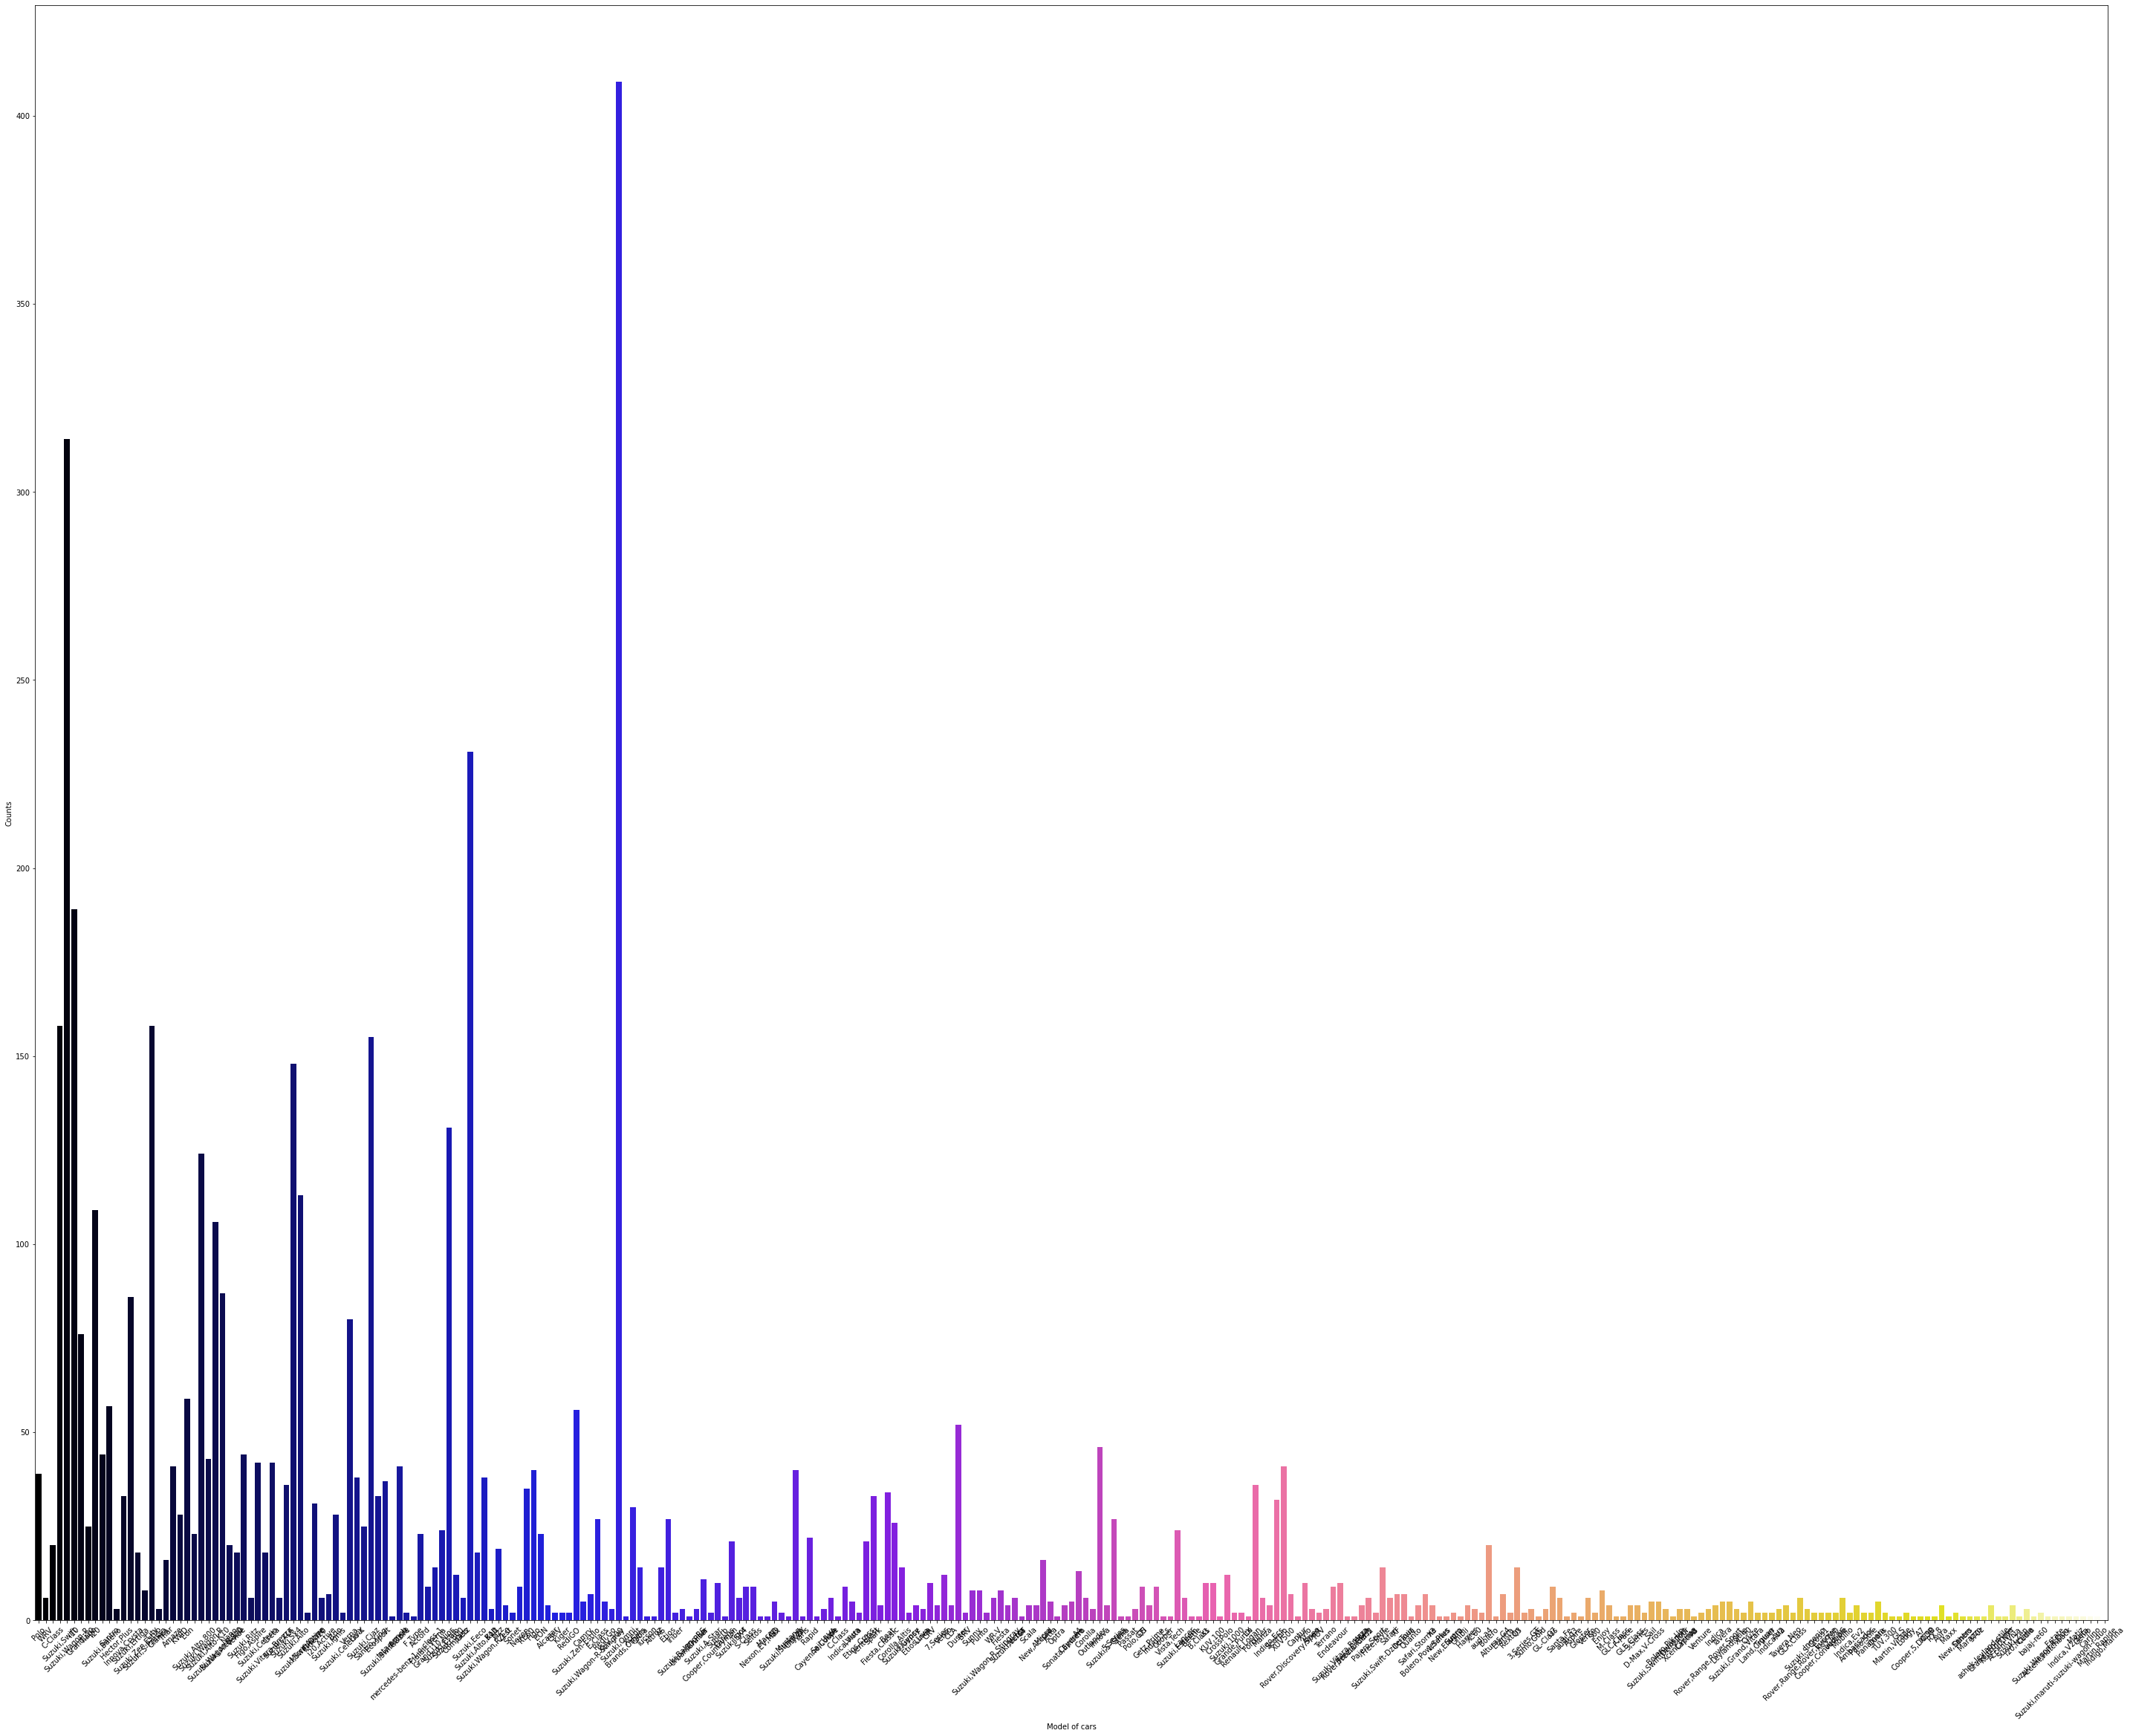

Suzuki,Omni       409
Suzuki,Wagon-R    314
Suzuki,Eeco       231
i10               189
City              158
                 ... 
Yaris               1
B,Class             1
Beetle              1
Cayenne,Coupe       1
Indigo,Marina       1
Name: Model with Variant, Length: 293, dtype: int64


In [38]:
plt.figure(figsize=(50,40))
sns.countplot(x='Model with Variant',data=car,palette='gnuplot2')
plt.xlabel("Model of cars")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(car['Model with Variant'].value_counts())

Maruti Suzuki Omni, and Maruti Suzuki Wegon-R are Most selling car in the market.

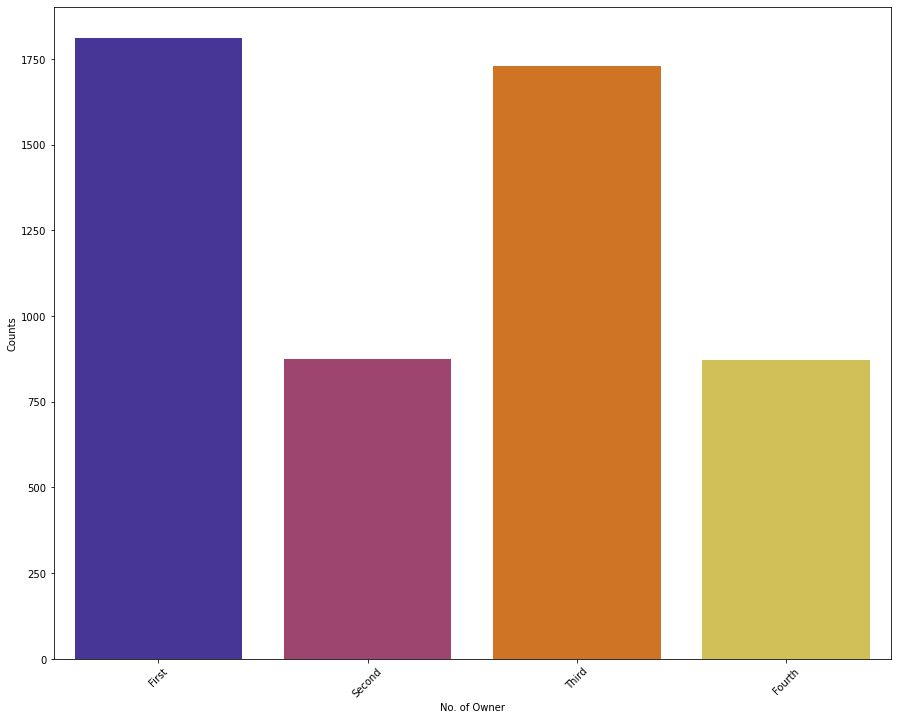

First     1812
Third     1728
Second     874
Fourth     871
Name: No. of Owner, dtype: int64


In [42]:

plt.figure(figsize=(15,12))
sns.countplot(x='No. of Owner',data=car,palette='CMRmap')
plt.xlabel("No. of Owner")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(car['No. of Owner'].value_counts())

First hand cars are most relevant acording to market.

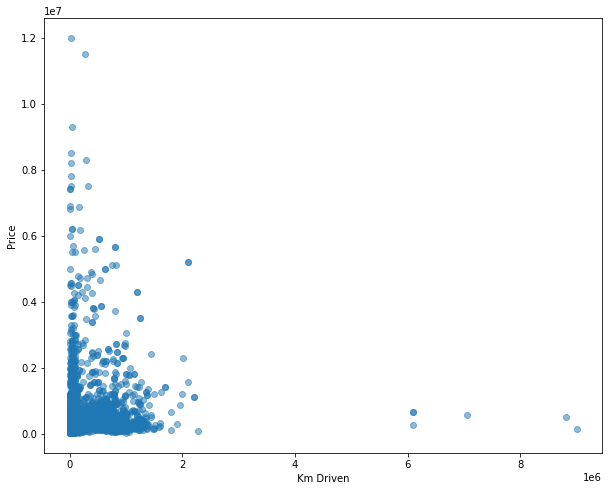

In [43]:
N=6651
plt.figure(figsize=(10,8))
area = (30 * np.random.rand(N))**2
plt.scatter(car['Driven KM'], car['Price'],alpha=0.5)
plt.xlabel(" Km Driven ")
plt.ylabel("Price")
plt.show()

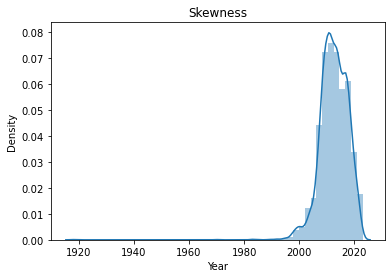

In [44]:
sns.distplot(car["Manufacturing Year"])
plt.xlabel("Year")
plt.title("Skewness")
plt.show()

Year column is Left skewed.

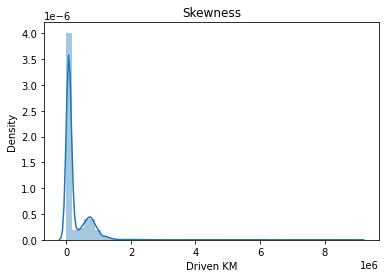

In [45]:
sns.distplot(car["Driven KM"])
plt.xlabel("Driven KM")
plt.title("Skewness")
plt.show()

Driven Km column is Right Skewed.

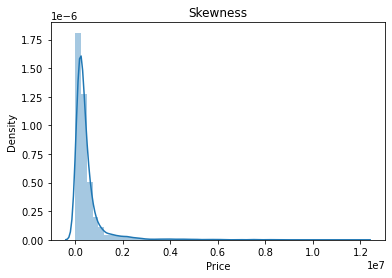

In [46]:
sns.distplot(car["Price"])
plt.xlabel("Price")
plt.title("Skewness")
plt.show()

Price column is also Right Skewed.

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

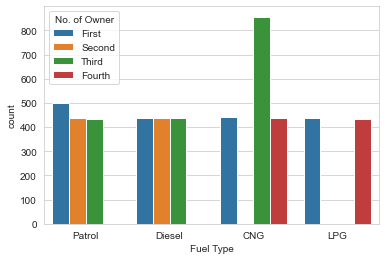

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Fuel Type',hue='No. of Owner',data=car)

CNG car by Third owner is most selling car.

## Model:

In [48]:
x=car.drop(columns='Price')
y=car["Price"]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [51]:
ohe=OneHotEncoder()
ohe.fit(x[['Brand','Model with Variant','Fuel Type','No. of Owner']])

OneHotEncoder()

In [52]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model with Variant','Fuel Type','No. of Owner']),remainder='passthrough')

In [53]:
lr=LinearRegression()

In [54]:
pipe=make_pipeline(column_trans,lr)

In [55]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador', 'Ashok', 'Aston', 'Audi', 'BMW', 'Bajaj', 'Bentley',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG',
       'Mahindra', 'Maruti', 'Maserati', 'Maz...
       'Zest', 'ashok-leyland-stile', 'audi-a4', 'audi-a6', 'audi-q3',
       'bajaj-re60', 'i10', 'i20', 'i20,Active', 'i20,N,Line',
       'mercedes-benz-1-c-class-1', 'tata-punch'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'LPG', 'Patrol'], dtype=object),
                                                                            array(['First', 'Fourth', 'Second', 'Third'], dtype=object)]),
                        

In [56]:
y_pred=pipe.predict(x_test)

In [57]:
y_pred

array([ 375167.95371153,  317425.01834442,  -47917.70991404, ...,
        469145.7966091 ,  220868.45274247, -140738.08198955])

In [58]:
r2_score(y_test,y_pred)

0.6751170036083275

In [59]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [60]:

np.argmax(scores)

445

In [61]:
scores[np.argmax(scores)]

0.783304390142962

In [62]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
                                                  
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    r2_score(y_test,y_pred)

0.783304390142962

In [63]:
import pickle

In [64]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [65]:
pipe.predict(pd.DataFrame([["Maruti","Suzuki,Swift",2019,50000,"Patrol","First"]],columns=["Brand","Model with Variant","Manufacturing Year","Driven KM","Fuel Type","No. of Owner"]))

array([607414.77723713])